In [1]:
from keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
labels = ["T-shirt", "Trouser", "Pullover",
          "Dress", "Coat", "Sandal", "Shirt",
          "Sneaker", "Bag", "Ankle Boot"]

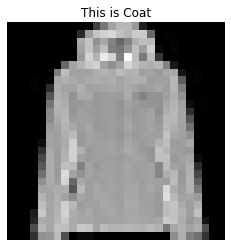

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + labels[y_train[c]])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [10]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,63,118,164,183,183,151,31,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,41,157,196,208,214,192,182,204,204,103,0,4,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,171,197,145,168,132,102,130,174,190,186,0,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,0,164,195,158,191,126,117,149,191,159,208,8,0,5,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,153,211,179,234,210,127,255,189,121,187,54,0,0,0,0,0,0,0,0
5,0,0,0,0,2,0,0,104,163,181,199,209,161,144,161,213,193,181,174,182,130,25,0,0,0,0,0,0
6,0,0,0,0,0,0,125,189,162,161,161,174,178,171,187,177,180,160,163,155,170,168,20,0,3,0,0,0
7,0,0,0,3,0,5,169,175,169,162,168,173,169,175,163,172,177,173,157,160,160,183,93,0,5,0,0,0
8,0,0,0,4,0,46,173,164,163,176,161,162,165,168,164,171,164,157,160,167,158,181,126,0,0,0,0,0
9,0,0,0,1,0,86,177,167,146,170,168,154,155,158,156,170,147,132,146,148,161,174,146,0,0,1,0,0


In [11]:
# 圖片調整: (0~1) /255 -> tesorflow weights, reshape -> mlp只吃一維
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255

In [12]:
# 答案調整: One-hot Encoding: 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Before:", y_train[0])
print("After:", y_train_cat[0])

Before: 9
After: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [16]:
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [19]:
# batch_size: 看了幾筆資料才做一次調整(梯度下降)(更新參數)
# 資料不大: 100~200  資料很大: 10~20
# epochs: 整份資料要翻幾遍, 控制擬合程度
# val_loss平滑就該停下來
# validation_split: 驗證模型好不好, 要用沒看過的資料
# verbose: 印出多少log(1:最詳細 2:必要的 0:無)
# 10(epochs) * 54000(訓練資料) / 200(筆調整一次) = 2700(調整)
mlp.fit(x_train_reshape, y_train_cat,
        batch_size=200, epochs=3,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
 - 1s - loss: 0.2409 - acc: 0.9117 - val_loss: 0.3102 - val_acc: 0.8890
Epoch 2/3
 - 1s - loss: 0.2360 - acc: 0.9141 - val_loss: 0.3124 - val_acc: 0.8860
Epoch 3/3
 - 1s - loss: 0.2282 - acc: 0.9162 - val_loss: 0.3291 - val_acc: 0.8840


In [20]:
mlp.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.35199129519462585, 0.875]

In [22]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_reshape)

c = [(str(l) + "(預測)") for l in labels]
i = [(str(l) + "(正確)") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle Boot(預測)
T-shirt(正確),856,5,17,21,13,2,77,0,9,0
Trouser(正確),1,973,0,20,4,0,1,0,1,0
Pullover(正確),19,0,706,7,214,0,53,0,1,0
Dress(正確),17,12,12,854,81,1,17,0,5,1
Coat(正確),0,1,38,11,925,0,24,0,1,0
Sandal(正確),0,0,0,1,0,954,0,27,1,17
Shirt(正確),137,4,64,30,156,0,598,0,11,0
Sneaker(正確),0,0,0,0,0,9,0,955,1,35
Bag(正確),6,0,3,2,10,2,4,3,970,0
Ankle Boot(正確),0,0,0,0,0,10,1,30,0,959


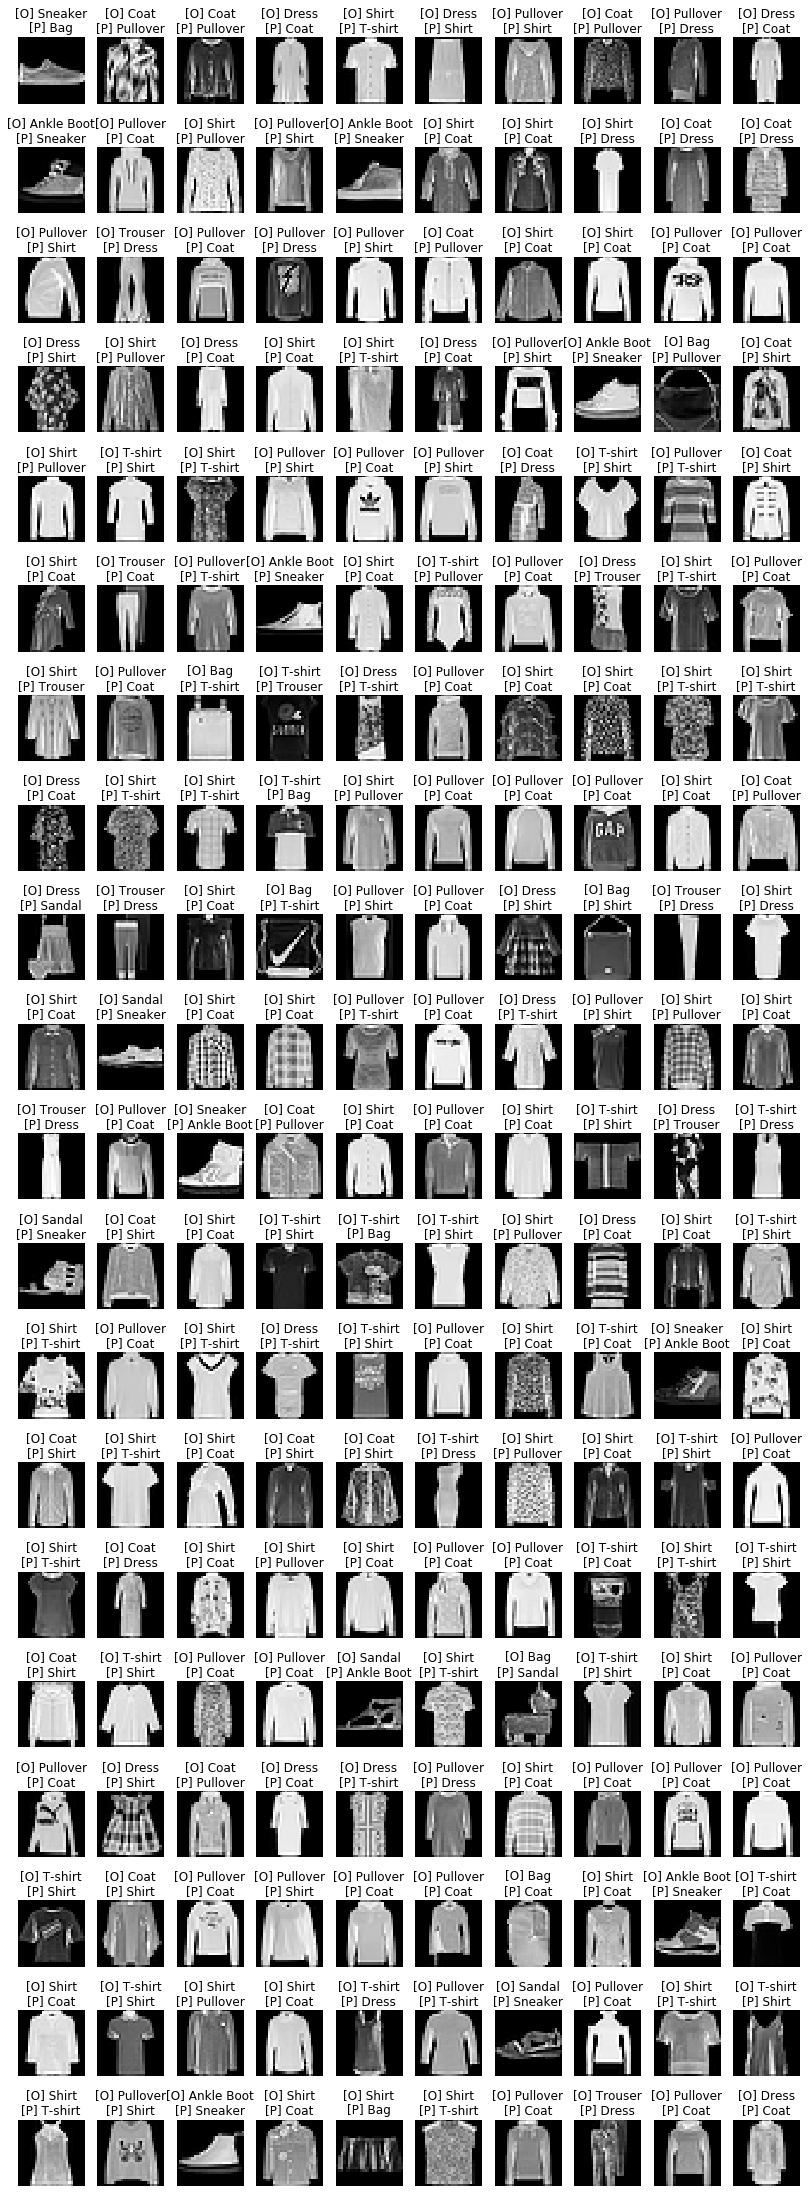

In [26]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_img = x_test[idx]
false_answer = y_test[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O] " + labels[false_answer[i]] + "\n[P] " + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

請輸入你要檢測的圖test3.png
應該是: 4


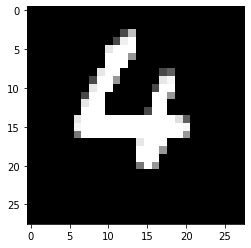

In [16]:
from keras.preprocessing.image import load_img
fp = input("請輸入你要檢測的圖")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img)
img_np_norm = img_np / 255
img_np_norm = img_np_norm.reshape(1, 784)
print("應該是:", mlp.predict_classes(img_np_norm)[0])
plt.imshow(img_np, cmap="gray")